# Experiment: Support Vector Machine Classifier on iris dataset

## ⚖️ Quick Summary

**Goal:** Find the optimal decision boundary that maximizes the margin between classes.

---

### 🧠 Core Idea:
- SVM finds the **hyperplane** that best separates classes with the **largest margin**.
- Uses **support vectors** (critical boundary cases) to define the hyperplane.
- Can use kernels to handle **nonlinear** separation.

---

### 🧮 Example Configuration / Hyperparams:
- `kernel='rbf'` *(default: good for nonlinear boundaries)*
- `C=1.0` *(regularization strength)*
- `gamma='scale'` *(kernel coefficient)*

---

### 🔧 Expectations:

| Aspect          | Expectation       | Notes                                                       |
|-----------------|-------------------|-------------------------------------------------------------|
| Accuracy        | High         | Excellent for small, clean datasets like Iris               |
| Overfitting     | Moderate (tunable)| Controlled via `C` and kernel choice                        |
| Training Time   | Moderate          | Slower than KNN or DTC; fast on small datasets              |
| Interpretability| Low               | Not easily visualizable or interpretable                   |
| Kernel Choice   | Critical          | RBF for nonlinear, linear for simpler separable cases       |

---

### 🔑 Characteristics:
- Powerful for both linear and nonlinear problems.
- Sensitive to **feature scaling**.
- Kernel trick makes SVM flexible, but tuning is important.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# scv specific imports
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

# experiment helper imports
from helpers.base_imports import *

## Setup experiment with data and model

In [3]:
exp = Experiment(
    type="c",  # classification
    name="svc-iris-linear",
    dataset="iris-20test-shuffled-v1",
)
exp

Loading 'classification-experiments.csv'
Creating experiment: 'svc-iris-linear'
Loading 'svc-iris-linear' estimator/model/pipeline


/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.5.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionW

Experiment(c, svc-iris-linear, iris-20test-shuffled-v1)

Note that sklearn has svm.SVC(kernel="linear", C=C) and svm.LinearSVC(C=C, max_iter=10000) for linear SVMs. The former is more flexible and can use other kernels, while the latter is optimized for linear kernels and a bit faster. For this small dataset we'll just use the former.

In [4]:
# add the steps to the pipeline
steps = [
    ("scaler", StandardScaler()),
    (
        "classifier",
        SVC(
            kernel="linear",  # linear, poly, rbg, etc
            gamma="auto",  # kernel coefficient (1/n features)
            C=1.0,  # regularization parameter
            random_state=RANDOM_SEED,
        ),
    ),
]
exp.estimator = Pipeline(
    steps=steps,
    memory=CACHE_DIR,
)

In [5]:
exp.estimator.get_params()

{'memory': '.cache',
 'steps': [('scaler', StandardScaler()),
  ('classifier', SVC(gamma='auto', kernel='linear', random_state=0))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': SVC(gamma='auto', kernel='linear', random_state=0),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__C': 1.0,
 'classifier__break_ties': False,
 'classifier__cache_size': 200,
 'classifier__class_weight': None,
 'classifier__coef0': 0.0,
 'classifier__decision_function_shape': 'ovr',
 'classifier__degree': 3,
 'classifier__gamma': 'auto',
 'classifier__kernel': 'linear',
 'classifier__max_iter': -1,
 'classifier__probability': False,
 'classifier__random_state': 0,
 'classifier__shrinking': True,
 'classifier__tol': 0.001,
 'classifier__verbose': False}

Get dataset by name (eda already done in another notebook and train/test split saved so we will be working with the same data)

In [6]:
notes, X_train, X_test, y_train, y_test, target_names = get_dataset(exp.dataset)
print(notes)
print(target_names)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Dataset: iris-20test-shuffled-v1
X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)
Train: 80.00% of total
Test: 20.00% of total
Notes: None
Created by save_dataset() helper at 2024-07-09 12:28:10

  target_names
0       setosa
1   versicolor
2    virginica


((120, 4), (30, 4), (120, 1), (30, 1))

In [10]:
# Make sure both are 1D numpy arrays
# y_train = y_train.to_numpy().ravel()
# y_test = y_test.to_numpy().ravel()
print("y_train:", type(y_train), y_train.shape)
print("y_test:", type(y_test), y_test.shape)

y_train: <class 'numpy.ndarray'> (120,)
y_test: <class 'numpy.ndarray'> (30,)


In [12]:
classes, counts = np.unique(y_train, return_counts=True)
for label, count in zip(classes, counts):
    print(f"Class {label}: {count} samples")

Class 0: 39 samples
Class 1: 37 samples
Class 2: 44 samples


SVM is biased towards majority class but classes in the train data are roughly balanced so we'll continue without any class balancing.

In [13]:
exp.update_param("n_train_samples", X_train.shape[0])
exp.update_param("n_test_samples", X_test.shape[0])
exp.summary_df

,dataset_name,n_train_samples,n_test_samples,mean_accuracy,train_time,query_time,kfolds,confusion_matrix,classification_report
exp_name,,,,,,,,,
svc-iris-linear,iris-20test-shuffled-v1,120,30,NaN,NaN,NaN,NaN,NaN,NaN


## Optimize hyperparameters

In [14]:
# add the steps to the pipeline
steps = [
    # NOTE: DTs don't need scaling, but we include it here for consistency when comparing to other classifiers
    ("scaler", StandardScaler()),
    (
        "classifier",
        SVC(
            kernel="linear",  # linear, poly, rbg, etc
            gamma="auto",  # kernel coefficient (1/n features)
            C=1.0,  # regularization parameter
            random_state=RANDOM_SEED,
        ),
    ),
]

exp.estimator = Pipeline(
    steps=steps,
    memory=CACHE_DIR,
)

In [16]:
param_grid = {
    "classifier__kernel": ["linear", "rbf", "poly"],
    "classifier__C": [0.1, 1, 10, 100],
    "classifier__gamma": ["scale", "auto", 0.1, 0.01, 0.001],
}

grid = GridSearchCV(exp.estimator, param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

Best Params: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best Cross-Validation Score: 0.975


Ok, it does well with a C of 1 (regularization strength) and a linear kernel.

In [18]:
grid.best_estimator_.get_params()

{'memory': '.cache',
 'steps': [('scaler', StandardScaler()),
  ('classifier', SVC(C=1, kernel='linear', random_state=0))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': SVC(C=1, kernel='linear', random_state=0),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__C': 1,
 'classifier__break_ties': False,
 'classifier__cache_size': 200,
 'classifier__class_weight': None,
 'classifier__coef0': 0.0,
 'classifier__decision_function_shape': 'ovr',
 'classifier__degree': 3,
 'classifier__gamma': 'scale',
 'classifier__kernel': 'linear',
 'classifier__max_iter': -1,
 'classifier__probability': False,
 'classifier__random_state': 0,
 'classifier__shrinking': True,
 'classifier__tol': 0.001,
 'classifier__verbose': False}

In [19]:
my_params = {
    "classifier__kernel": "linear",
    "classifier__C": 1.0,
    # "classifier__gamma": "auto",
}
exp.estimator.set_params(**my_params)
exp.estimator.get_params()

{'memory': '.cache',
 'steps': [('scaler', StandardScaler()),
  ('classifier', SVC(gamma='auto', kernel='linear', random_state=0))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': SVC(gamma='auto', kernel='linear', random_state=0),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__C': 1.0,
 'classifier__break_ties': False,
 'classifier__cache_size': 200,
 'classifier__class_weight': None,
 'classifier__coef0': 0.0,
 'classifier__decision_function_shape': 'ovr',
 'classifier__degree': 3,
 'classifier__gamma': 'auto',
 'classifier__kernel': 'linear',
 'classifier__max_iter': -1,
 'classifier__probability': False,
 'classifier__random_state': 0,
 'classifier__shrinking': True,
 'classifier__tol': 0.001,
 'classifier__verbose': False}

In [20]:
# fit on training data
start_time = pd.Timestamp.now()
exp.estimator.fit(X=X_train, y=y_train)
train_time = pd.Timestamp.now() - start_time

In [21]:
exp.update_param("train_time", train_time)
exp.update_param(
    "mean_accuracy",
    exp.estimator.score(X_test, y_test),
    # add_column=True
)
exp.summary_df

,dataset_name,n_train_samples,n_test_samples,mean_accuracy,train_time,query_time,kfolds,confusion_matrix,classification_report
exp_name,,,,,,,,,
svc-iris-linear,iris-20test-shuffled-v1,120,30,0.966667,0 days 00:00:00.003818,NaN,NaN,NaN,NaN


## Take a look at the trained model

In [22]:
# get precision, recall, f1, accuracy
start_time = pd.Timestamp.now()
y_pred = exp.estimator.predict(X_test)
query_time = pd.Timestamp.now() - start_time

In [23]:
exp.update_param("query_time", query_time)

Text(0.5, 1.0, 'Confusion Matrix')

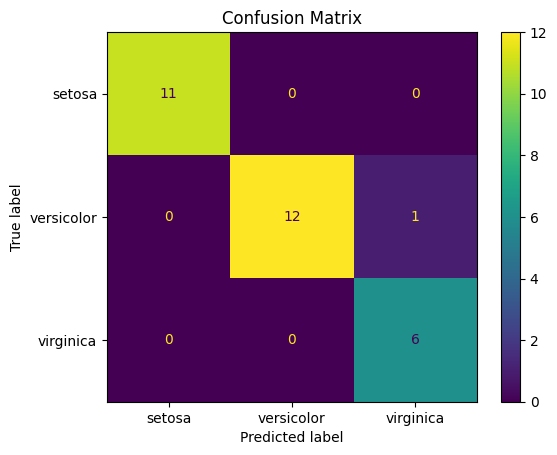

In [25]:
target_names_list = target_names["target_names"].tolist()
cm = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred,
    # normalize="true"
)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names_list)
cmd.plot()
plt.title("Confusion Matrix")
# plt.savefig(f"{FIGS_DIR}/{exp.name}_confusion-matrix.png")

In [26]:
exp.update_param("confusion_matrix", np.array2string(cm))

In [27]:
cr = classification_report(y_true=y_test, y_pred=y_pred, output_dict=True)
exp.update_param("classification_report", str(cr))
cr

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11.0},
 '1': {'precision': 1.0,
  'recall': 0.9230769230769231,
  'f1-score': 0.96,
  'support': 13.0},
 '2': {'precision': 0.8571428571428571,
  'recall': 1.0,
  'f1-score': 0.9230769230769231,
  'support': 6.0},
 'accuracy': 0.9666666666666667,
 'macro avg': {'precision': 0.9523809523809524,
  'recall': 0.9743589743589745,
  'f1-score': 0.9610256410256411,
  'support': 30.0},
 'weighted avg': {'precision': 0.9714285714285714,
  'recall': 0.9666666666666667,
  'f1-score': 0.9672820512820512,
  'support': 30.0}}

In [29]:
# add custom decision tree classification specific metrics to the summary_df
exp.update_param(
    "kernel",
    exp.estimator.named_steps["classifier"].kernel,
    add_column=True,
)

exp.update_param(
    "C",
    exp.estimator.named_steps["classifier"].C,
    add_column=True,
)
exp.update_param(
    "gamma",
    exp.estimator.named_steps["classifier"].gamma,
    add_column=True,
)
exp.summary_df

Adding column: kernel
Adding column: C
Adding column: gamma


,dataset_name,n_train_samples,n_test_samples,mean_accuracy,train_time,query_time,kfolds,confusion_matrix,classification_report,kernel,C,gamma
exp_name,,,,,,,,,,,,
svc-iris-linear,iris-20test-shuffled-v1,120,30,0.966667,0 days 00:00:00.003818,0 days 00:00:00.001419,NaN,[[11 0 0]\n [ 0 12 1]\n [ 0 0 6]],"{'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...",linear,1.0,auto


In [ ]:
exp.save(overwrite_existing=False)